<a href="https://colab.research.google.com/github/bhkpriyanka/EVA4/blob/master/Week7/Approach2/S7_FinalCode_Modularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/EVA4_19012020/Week7/PythonFiles/')
from all_imports import *
import get_train_test as tt
import train_test_loader as ttl
import get_model as gm
import train_test_def as ttd

CUDA Available? True


In [3]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/EVA4_19012020/Week7/PythonFiles/']

In [4]:
train = tt.get_train('CIFAR10')
test = tt.get_test('CIFAR10')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_loader, test_loader = ttl.get_train_test_loader(train,test)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = gm.get_model_instance(0.10).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]             576
           Conv2d-10          [-1, 128, 32, 32]           8,320
      BatchNorm2d-11          [-1, 128, 32, 32]             256
             ReLU-12          [-1, 128, 32, 32]               0
          Dropout-13          [-1, 128, 32, 32]               0
           Conv2d-14           [-1

In [7]:
# model =  Net().to(device)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
# criterion = nn.CrossEntropyLoss()
# criterion1 = nn.CrossEntropyLoss(reduction='sum')
model = gm.get_model_instance(0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    a,b = ttd.train(model, device, train_loader, optimizer, epoch)
    train_losses.extend(a)
    train_acc.extend(b)
    c,d = ttd.test(model, device, test_loader)
    test_losses.extend(c)
    test_acc.extend(d)
    scheduler.step()
    print('')

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.883533000946045 Batch_id=781 Accuracy=42.19: 100%|██████████| 782/782 [00:20<00:00, 38.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3827, Accuracy: 4983/10000 (49.83%)


EPOCH: 2


Loss=0.8814898729324341 Batch_id=781 Accuracy=58.87: 100%|██████████| 782/782 [00:21<00:00, 37.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0364, Accuracy: 6212/10000 (62.12%)


EPOCH: 3


Loss=0.9044203758239746 Batch_id=781 Accuracy=65.45: 100%|██████████| 782/782 [00:20<00:00, 44.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9578, Accuracy: 6669/10000 (66.69%)


EPOCH: 4


Loss=1.1521351337432861 Batch_id=781 Accuracy=69.30: 100%|██████████| 782/782 [00:20<00:00, 38.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8080, Accuracy: 7143/10000 (71.43%)


EPOCH: 5


Loss=0.6982586979866028 Batch_id=781 Accuracy=71.91: 100%|██████████| 782/782 [00:20<00:00, 38.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7783, Accuracy: 7280/10000 (72.80%)


EPOCH: 6


Loss=0.8029717206954956 Batch_id=781 Accuracy=73.22: 100%|██████████| 782/782 [00:20<00:00, 39.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7490, Accuracy: 7447/10000 (74.47%)


EPOCH: 7


Loss=1.165236234664917 Batch_id=781 Accuracy=74.63: 100%|██████████| 782/782 [00:20<00:00, 38.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7207, Accuracy: 7519/10000 (75.19%)


EPOCH: 8


Loss=0.6808006763458252 Batch_id=781 Accuracy=76.02: 100%|██████████| 782/782 [00:20<00:00, 38.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7791, Accuracy: 7359/10000 (73.59%)


EPOCH: 9


Loss=0.4340781569480896 Batch_id=781 Accuracy=77.28: 100%|██████████| 782/782 [00:20<00:00, 38.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6840, Accuracy: 7615/10000 (76.15%)


EPOCH: 10


Loss=0.3716348111629486 Batch_id=781 Accuracy=77.78: 100%|██████████| 782/782 [00:20<00:00, 44.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6635, Accuracy: 7729/10000 (77.29%)


EPOCH: 11


Loss=0.402637779712677 Batch_id=781 Accuracy=78.44: 100%|██████████| 782/782 [00:21<00:00, 36.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6090, Accuracy: 7912/10000 (79.12%)


EPOCH: 12


Loss=1.1413413286209106 Batch_id=781 Accuracy=79.15: 100%|██████████| 782/782 [00:21<00:00, 37.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5838, Accuracy: 8027/10000 (80.27%)


EPOCH: 13


Loss=0.6673486232757568 Batch_id=781 Accuracy=79.93: 100%|██████████| 782/782 [00:20<00:00, 38.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5703, Accuracy: 8041/10000 (80.41%)


EPOCH: 14


Loss=0.6672316193580627 Batch_id=781 Accuracy=80.18: 100%|██████████| 782/782 [00:20<00:00, 38.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6106, Accuracy: 7887/10000 (78.87%)


EPOCH: 15


Loss=0.5332043170928955 Batch_id=781 Accuracy=80.89: 100%|██████████| 782/782 [00:20<00:00, 38.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5877, Accuracy: 7996/10000 (79.96%)


EPOCH: 16


Loss=0.8847693204879761 Batch_id=781 Accuracy=83.55: 100%|██████████| 782/782 [00:20<00:00, 45.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5084, Accuracy: 8320/10000 (83.20%)


EPOCH: 17


Loss=0.14038731157779694 Batch_id=781 Accuracy=84.32: 100%|██████████| 782/782 [00:20<00:00, 38.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5051, Accuracy: 8315/10000 (83.15%)


EPOCH: 18


Loss=0.07333803176879883 Batch_id=781 Accuracy=84.36: 100%|██████████| 782/782 [00:19<00:00, 47.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5039, Accuracy: 8330/10000 (83.30%)


EPOCH: 19


Loss=0.3326766788959503 Batch_id=781 Accuracy=84.51: 100%|██████████| 782/782 [00:19<00:00, 44.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4983, Accuracy: 8344/10000 (83.44%)


EPOCH: 20


Loss=0.5772823095321655 Batch_id=781 Accuracy=84.93: 100%|██████████| 782/782 [00:20<00:00, 38.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5024, Accuracy: 8326/10000 (83.26%)


EPOCH: 21


Loss=0.615253210067749 Batch_id=781 Accuracy=85.05: 100%|██████████| 782/782 [00:20<00:00, 38.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5055, Accuracy: 8319/10000 (83.19%)


EPOCH: 22


Loss=0.9228441119194031 Batch_id=781 Accuracy=85.10: 100%|██████████| 782/782 [00:20<00:00, 38.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4990, Accuracy: 8333/10000 (83.33%)


EPOCH: 23


Loss=0.24163085222244263 Batch_id=781 Accuracy=85.46: 100%|██████████| 782/782 [00:20<00:00, 38.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4981, Accuracy: 8332/10000 (83.32%)


EPOCH: 24


Loss=0.9415723085403442 Batch_id=781 Accuracy=85.35: 100%|██████████| 782/782 [00:20<00:00, 38.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4899, Accuracy: 8368/10000 (83.68%)


EPOCH: 25


Loss=0.38798877596855164 Batch_id=781 Accuracy=85.39: 100%|██████████| 782/782 [00:20<00:00, 38.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 8342/10000 (83.42%)


EPOCH: 26


Loss=0.5369348526000977 Batch_id=781 Accuracy=85.35: 100%|██████████| 782/782 [00:20<00:00, 38.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4832, Accuracy: 8393/10000 (83.93%)


EPOCH: 27


Loss=0.7623701095581055 Batch_id=781 Accuracy=85.61: 100%|██████████| 782/782 [00:19<00:00, 46.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4874, Accuracy: 8379/10000 (83.79%)


EPOCH: 28


Loss=0.19435279071331024 Batch_id=781 Accuracy=85.48: 100%|██████████| 782/782 [00:20<00:00, 44.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4905, Accuracy: 8373/10000 (83.73%)


EPOCH: 29


Loss=0.9169940948486328 Batch_id=781 Accuracy=85.82: 100%|██████████| 782/782 [00:20<00:00, 38.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4938, Accuracy: 8401/10000 (84.01%)


EPOCH: 30


Loss=0.3076627552509308 Batch_id=781 Accuracy=85.77: 100%|██████████| 782/782 [00:20<00:00, 38.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4862, Accuracy: 8410/10000 (84.10%)


EPOCH: 31


Loss=0.34374651312828064 Batch_id=781 Accuracy=86.15: 100%|██████████| 782/782 [00:20<00:00, 38.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4875, Accuracy: 8401/10000 (84.01%)


EPOCH: 32


Loss=0.31764498353004456 Batch_id=781 Accuracy=86.38: 100%|██████████| 782/782 [00:20<00:00, 37.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4912, Accuracy: 8386/10000 (83.86%)


EPOCH: 33


Loss=0.35170093178749084 Batch_id=781 Accuracy=86.30: 100%|██████████| 782/782 [00:20<00:00, 38.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4967, Accuracy: 8359/10000 (83.59%)


EPOCH: 34


Loss=0.5394985675811768 Batch_id=781 Accuracy=86.28: 100%|██████████| 782/782 [00:20<00:00, 38.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4909, Accuracy: 8387/10000 (83.87%)


EPOCH: 35


Loss=0.1429818868637085 Batch_id=781 Accuracy=86.59: 100%|██████████| 782/782 [00:20<00:00, 37.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4874, Accuracy: 8372/10000 (83.72%)


EPOCH: 36


Loss=0.2408229410648346 Batch_id=781 Accuracy=86.33: 100%|██████████| 782/782 [00:20<00:00, 37.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 8343/10000 (83.43%)


EPOCH: 37


Loss=0.4319448471069336 Batch_id=781 Accuracy=86.44: 100%|██████████| 782/782 [00:20<00:00, 38.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4914, Accuracy: 8389/10000 (83.89%)


EPOCH: 38


Loss=0.3408656418323517 Batch_id=781 Accuracy=86.52: 100%|██████████| 782/782 [00:20<00:00, 37.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4885, Accuracy: 8397/10000 (83.97%)


EPOCH: 39


Loss=0.43304041028022766 Batch_id=781 Accuracy=86.36: 100%|██████████| 782/782 [00:20<00:00, 37.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4905, Accuracy: 8392/10000 (83.92%)


EPOCH: 40


Loss=0.6328283548355103 Batch_id=781 Accuracy=86.32: 100%|██████████| 782/782 [00:20<00:00, 38.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4905, Accuracy: 8402/10000 (84.02%)


EPOCH: 41


Loss=0.3219824731349945 Batch_id=781 Accuracy=86.53: 100%|██████████| 782/782 [00:20<00:00, 38.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4902, Accuracy: 8405/10000 (84.05%)


EPOCH: 42


Loss=0.4795995056629181 Batch_id=781 Accuracy=86.50: 100%|██████████| 782/782 [00:20<00:00, 38.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4910, Accuracy: 8407/10000 (84.07%)


EPOCH: 43


Loss=0.25182056427001953 Batch_id=781 Accuracy=86.40: 100%|██████████| 782/782 [00:20<00:00, 37.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4919, Accuracy: 8403/10000 (84.03%)


EPOCH: 44


Loss=0.6909546256065369 Batch_id=781 Accuracy=86.37: 100%|██████████| 782/782 [00:20<00:00, 38.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4893, Accuracy: 8399/10000 (83.99%)


EPOCH: 45


Loss=0.23166340589523315 Batch_id=781 Accuracy=86.36: 100%|██████████| 782/782 [00:20<00:00, 38.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4929, Accuracy: 8402/10000 (84.02%)


EPOCH: 46


Loss=1.2424510717391968 Batch_id=781 Accuracy=86.52: 100%|██████████| 782/782 [00:20<00:00, 37.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4881, Accuracy: 8412/10000 (84.12%)


EPOCH: 47


Loss=0.6201038360595703 Batch_id=781 Accuracy=86.59: 100%|██████████| 782/782 [00:20<00:00, 37.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4856, Accuracy: 8408/10000 (84.08%)


EPOCH: 48


Loss=0.27605316042900085 Batch_id=781 Accuracy=86.49: 100%|██████████| 782/782 [00:20<00:00, 38.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4894, Accuracy: 8403/10000 (84.03%)


EPOCH: 49


Loss=0.5061678290367126 Batch_id=781 Accuracy=86.55: 100%|██████████| 782/782 [00:20<00:00, 37.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4897, Accuracy: 8410/10000 (84.10%)


EPOCH: 50


Loss=0.17515742778778076 Batch_id=781 Accuracy=86.73: 100%|██████████| 782/782 [00:21<00:00, 36.57it/s]



Test set: Average loss: 0.4974, Accuracy: 8381/10000 (83.81%)




Text(0.5, 1.0, 'Test Accuracy')

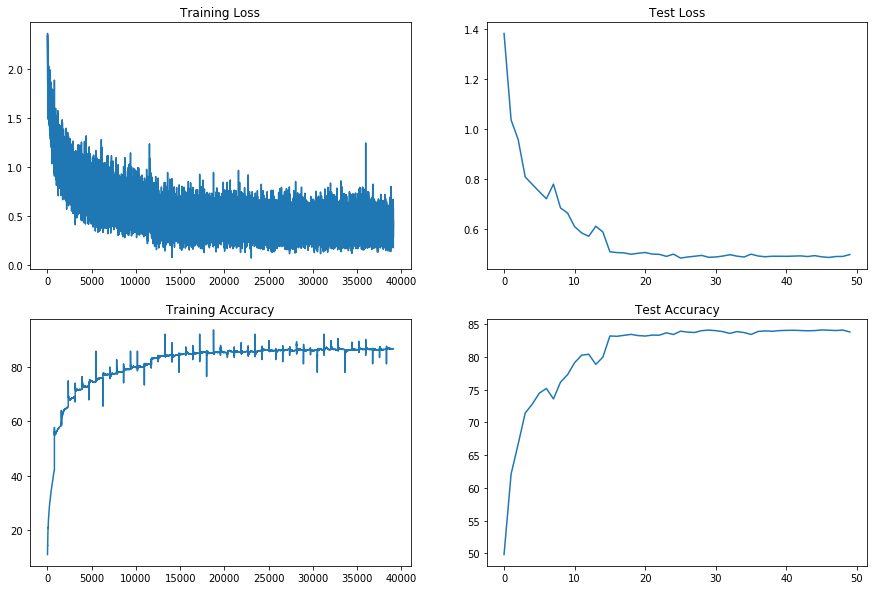

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")